In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated datetime to determine date of analysis based on API's call date information
from datetime import datetime

# Import API key
from openweath import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


606


In [44]:
# Starting API call URL 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Initialize an empty list to collect all the API's dict responses 
city_list = []


print("Begining Data Retrieval")
print("------------------------------")

# Loop through the cities and run a weather search for each city
# In the loop we have a condition to track cities in groups or sets of 50 and print the results accordingly
set_count = 1
record = 1

for i, city in enumerate(cities):
        if (i%50 == 0 and i>=50):
            set_count += 1
            record = 0
        
        query_url = url + "&q=" + city
         
        print("Processing Record %s of Set %s | %s" % (record, set_count, city))
        
        record +=1
        
        

        try:
            
            cities_weather = requests.get(query_url).json()
            
            city = cities_weather["name"]
            cloudiness = cities_weather["clouds"]["all"]
            country = cities_weather["sys"]["country"]
            date = cities_weather["dt"]
            humidity = cities_weather["main"]["humidity"]
            lat = cities_weather["coord"]["lat"]
            lng = cities_weather["coord"]["lon"]
            max_temp = cities_weather["main"]["temp_max"]
            wind_speed = cities_weather["wind"]["speed"]
            city_list.append({"City":city, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed })
        
           
             
            
        except:
            print("Missing city weather data.......skipping")                                                               
            pass



Begining Data Retrieval
------------------------------
Processing Record 1 of Set 1 | salto
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | atambua
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | kodinsk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | lamar
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | poninka
Processing Record 14 of Set 1 | cap malheureux
Processing Record 15 of Set 1 | barentsburg
Missing city weather data.......skipping
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | bushehr
Processing Record 19 of Set 1 | mantua
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | tiksi
Processing Record 

Processing Record 28 of Set 4 | nemuro
Processing Record 29 of Set 4 | ribeira grande
Processing Record 30 of Set 4 | port shepstone
Processing Record 31 of Set 4 | marolambo
Processing Record 32 of Set 4 | mirnyy
Processing Record 33 of Set 4 | geraldton
Processing Record 34 of Set 4 | tuni
Processing Record 35 of Set 4 | popondetta
Processing Record 36 of Set 4 | cidreira
Processing Record 37 of Set 4 | skaudvile
Processing Record 38 of Set 4 | mpika
Processing Record 39 of Set 4 | nioro
Processing Record 40 of Set 4 | el dorado
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | belushya guba
Missing city weather data.......skipping
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | budhgaon
Missing city weather data.......skipping
Processing Record 45 of Set 4 | sentyabrskiy
Missing city weather data.......skipping
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | bengkulu
Missing city weather data.......skipping
Proce

Processing Record 10 of Set 8 | beloha
Processing Record 11 of Set 8 | basco
Processing Record 12 of Set 8 | muros
Processing Record 13 of Set 8 | walla walla
Processing Record 14 of Set 8 | kurumkan
Processing Record 15 of Set 8 | hami
Processing Record 16 of Set 8 | amderma
Missing city weather data.......skipping
Processing Record 17 of Set 8 | barraute
Processing Record 18 of Set 8 | maralal
Processing Record 19 of Set 8 | biak
Processing Record 20 of Set 8 | pontes e lacerda
Processing Record 21 of Set 8 | bedesa
Processing Record 22 of Set 8 | saint-augustin
Processing Record 23 of Set 8 | ambon
Processing Record 24 of Set 8 | mackenzie
Processing Record 25 of Set 8 | dwarka
Processing Record 26 of Set 8 | matamoros
Processing Record 27 of Set 8 | goulburn
Processing Record 28 of Set 8 | minab
Processing Record 29 of Set 8 | amapa
Processing Record 30 of Set 8 | katha
Missing city weather data.......skipping
Processing Record 31 of Set 8 | norman wells
Processing Record 32 of Set

Processing Record 41 of Set 11 | talbahat
Processing Record 42 of Set 11 | marzuq
Processing Record 43 of Set 11 | praia da vitoria
Processing Record 44 of Set 11 | dinguiraye
Processing Record 45 of Set 11 | susaki
Processing Record 46 of Set 11 | xonacatlan
Processing Record 47 of Set 11 | lengshuitan
Processing Record 48 of Set 11 | bam
Processing Record 49 of Set 11 | qostanay
Processing Record 0 of Set 12 | los boquerones
Processing Record 1 of Set 12 | bukavu
Processing Record 2 of Set 12 | amos
Processing Record 3 of Set 12 | barcelos
Processing Record 4 of Set 12 | tocopilla
Processing Record 5 of Set 12 | sioux lookout
Processing Record 6 of Set 12 | jumla
Processing Record 7 of Set 12 | maceio
Processing Record 8 of Set 12 | antanifotsy
Processing Record 9 of Set 12 | monywa
Processing Record 10 of Set 12 | nilokheri
Processing Record 11 of Set 12 | ancud
Processing Record 12 of Set 12 | damphu
Processing Record 13 of Set 12 | touba
Processing Record 14 of Set 12 | mineiros
P

In [46]:
#creating a dataframe using the list of dicts
cities_df = pd.DataFrame(city_list)

# display dataframe
cities_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Salto,100,BR,1573148510,57,-23.20,-47.29,88.00,8.08
1,Flinders,2,AU,1573148511,30,-34.58,150.85,69.80,13.87
2,Albany,90,US,1573148511,70,42.65,-73.75,46.99,3.36
3,Atambua,53,ID,1573148511,84,-9.11,124.89,74.62,3.06
4,Mataura,34,NZ,1573148511,84,-46.19,168.86,53.01,4.00
5,Castro,74,CL,1573148511,49,-42.48,-73.76,53.67,5.50
6,Vaini,60,IN,1573148511,97,15.34,74.49,66.51,2.59
7,Qaanaaq,2,GL,1573148511,72,77.48,-69.36,-1.54,4.05
8,Kodinsk,100,RU,1573148512,96,58.60,99.18,29.32,9.33
9,Punta Arenas,85,CL,1573148512,72,-53.16,-70.91,43.20,26.82


In [83]:
# Save the DataFrame as a csv
cities_df.to_csv(output_data_file, encoding="utf-8", index=False)

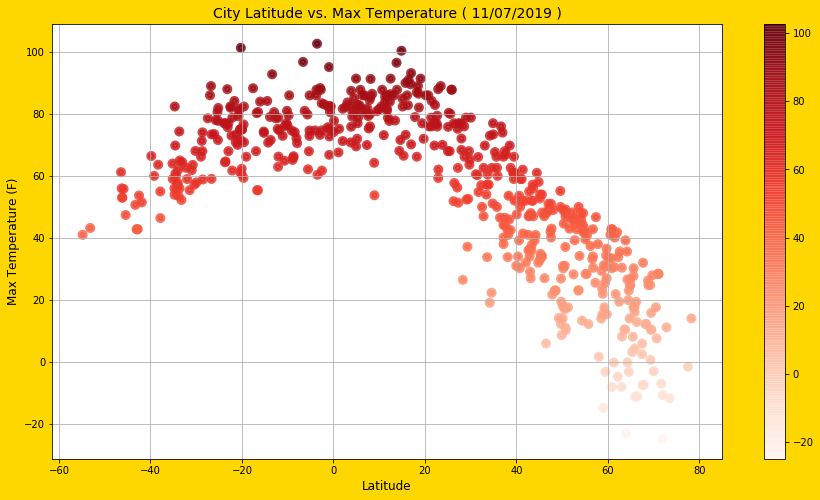

In [103]:
# Build a scatter plot for "Temperature (F) vs. Latitude"
plt.figure(figsize=(15,8), facecolor='gold')
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], c=cities_df["Max Temp"], cmap='Reds', linewidths=4, marker="o", alpha=0.8)

# Incorporate the other graph properties
date_analysis = datetime.fromtimestamp(cities_df["Date"][0])
date_analysis_f = date_analysis.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ( {date_analysis_f} )", fontsize = 14)
plt.ylabel("Max Temperature (F)", fontsize = 12)
plt.xlabel("Latitude", fontsize = 12)
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("MaxTemp_Latitude.png")

# Show plot
plt.show()

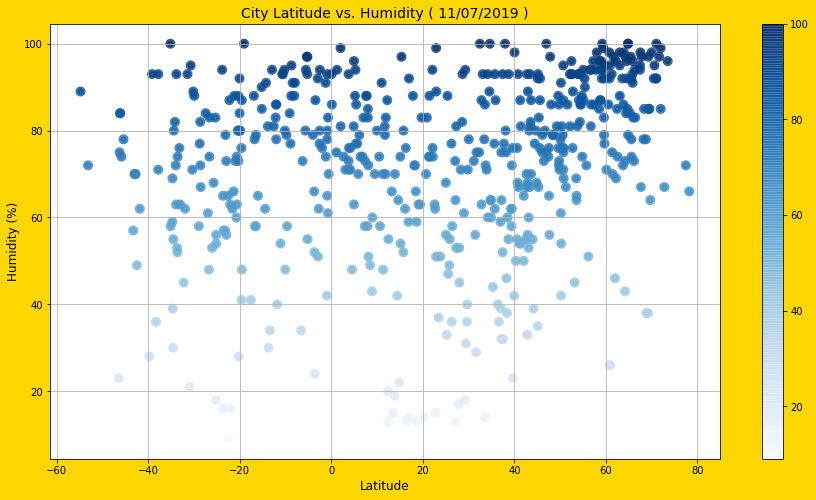

In [104]:
# Build a scatter plot for "Latitude vs. Humidity"
plt.figure(figsize=(15,8), facecolor='gold')
plt.scatter(cities_df["Lat"], cities_df["Humidity"], c=cities_df["Humidity"], cmap='Blues', linewidths=4, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ( {date_analysis_f} )", fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 12)
plt.xlabel("Latitude", fontsize = 12)
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

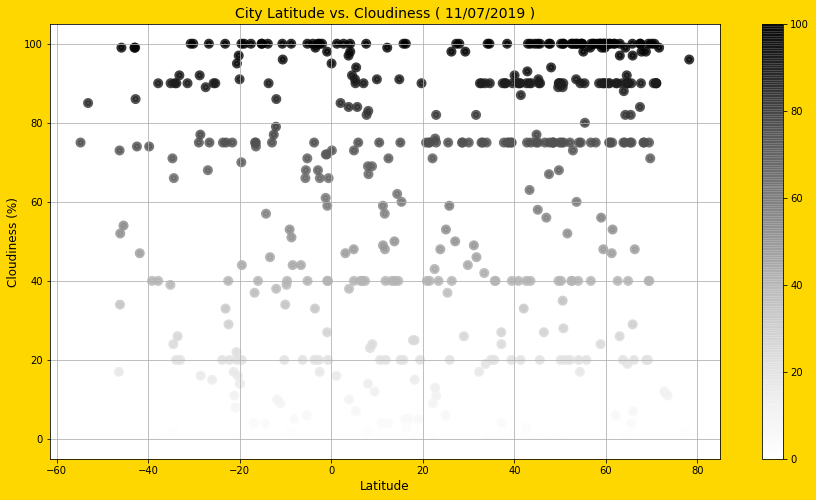

In [105]:
# Build a scatter plot for "Latitude vs. Cloudiness"
plt.figure(figsize=(15,8), facecolor='gold')
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], c=cities_df["Cloudiness"], cmap='Greys', linewidths=4, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ( {date_analysis_f} )", fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 12)
plt.xlabel("Latitude", fontsize = 12)
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

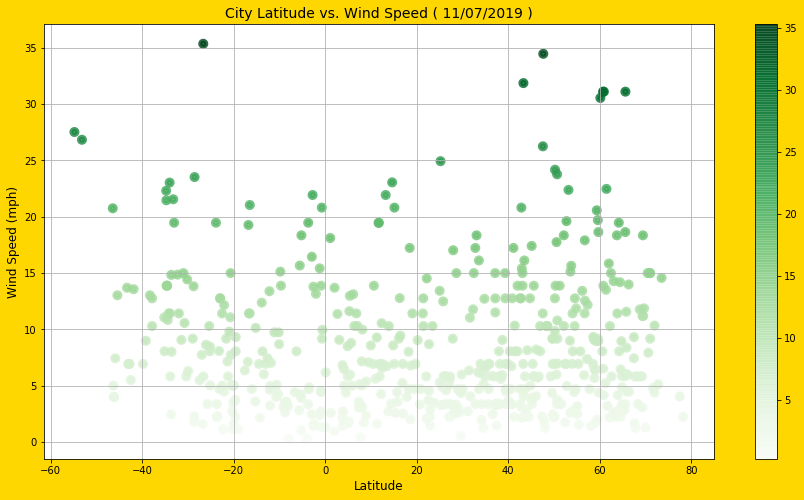

In [106]:
# Build a scatter plot for "Latitude vs. Wind Speed"
plt.figure(figsize=(15,8), facecolor='gold')
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], c=cities_df["Wind Speed"], cmap='Greens', linewidths=4, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ( {date_analysis_f} )", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 12)
plt.xlabel("Latitude", fontsize = 12)
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("Wind_Speed_Latitude.png")

# Show plot
plt.show()